In [1]:
import matplotlib.pyplot as plt
import numpy as np
import datetime
import os

from eolearn.core import EOTask, EOPatch, LinearWorkflow, FeatureType, SaveTask, OverwritePermission
from natsort import natsorted

# Для начала проведем чистку неполных данных

Полноценный Sentinel-2 L2A содержит следующую структуру:

In [23]:
path = './dataset_1/2021-01'
images = [f'image_{i}' for i in range(len(os.listdir(path)))]

In [3]:
# Проверяем структуру Sentinel изображения на наличие необходимых FeatureTypes:
# Если не хватает каких-то файлов/папок, то удаляем структуру
for i in range(len(images)):
    deep_path = f'{path}/image_{i}/sentinel2-l2a/patches/64x64-10/2021'
    for file_dir in [f'{deep_path}/data', f'{deep_path}/mask', f'{deep_path}/bbox.pkl.gz',
                     f'{deep_path}/meta_info.pkl.gz', f'{deep_path}/timestamp.pkl.gz']:
        if os.path.exists(file_dir):
            continue
        else:
            os.rmdir(f'{path}/image_{i}')

In [29]:
# Получим первые 30 патчей:
patches = []
for image in images:
    print(f'patching image {image}')
    if image == 'image_863':
        continue
    patch = EOPatch.load(f'{path}/{image}/sentinel2-l2a/patches/64x64-10/2021')
    patches.append(patch)

patching image image_0
patching image image_1
patching image image_2
patching image image_3
patching image image_4
patching image image_5
patching image image_6
patching image image_7
patching image image_8
patching image image_9
patching image image_10
patching image image_11
patching image image_12
patching image image_13
patching image image_14
patching image image_15
patching image image_16
patching image image_17
patching image image_18
patching image image_19
patching image image_20
patching image image_21
patching image image_22
patching image image_23
patching image image_24
patching image image_25
patching image image_26
patching image image_27
patching image image_28
patching image image_29
patching image image_30
patching image image_31
patching image image_32
patching image image_33
patching image image_34
patching image image_35
patching image image_36
patching image image_37
patching image image_38
patching image image_39
patching image image_40
patching image image_41
pa

patching image image_333
patching image image_334
patching image image_335
patching image image_336
patching image image_337
patching image image_338
patching image image_339
patching image image_340
patching image image_341
patching image image_342
patching image image_343
patching image image_344
patching image image_345
patching image image_346
patching image image_347
patching image image_348
patching image image_349
patching image image_350
patching image image_351
patching image image_352
patching image image_353
patching image image_354
patching image image_355
patching image image_356
patching image image_357
patching image image_358
patching image image_359
patching image image_360
patching image image_361
patching image image_362
patching image image_363
patching image image_364
patching image image_365
patching image image_366
patching image image_367
patching image image_368
patching image image_369
patching image image_370
patching image image_371
patching image image_372


patching image image_662
patching image image_663
patching image image_664
patching image image_665
patching image image_666
patching image image_667
patching image image_668
patching image image_669
patching image image_670
patching image image_671
patching image image_672
patching image image_673
patching image image_674
patching image image_675
patching image image_676
patching image image_677
patching image image_678
patching image image_679
patching image image_680
patching image image_681
patching image image_682
patching image image_683
patching image image_684
patching image image_685
patching image image_686
patching image image_687
patching image image_688
patching image image_689
patching image image_690
patching image image_691
patching image image_692
patching image image_693
patching image image_694
patching image image_695
patching image image_696
patching image image_697
patching image image_698
patching image image_699
patching image image_700
patching image image_701


In [6]:
def normalize(x):
    """
    Нормализация массива пикселей с shape(m, n, c) в диапазон [0, 1]
    m, n = 64; c = количество каналов
    """
    return np.array((x - np.min(x)) / (np.max(x) - np.min(x)))

IndexError: index 7 is out of bounds for axis 0 with size 7

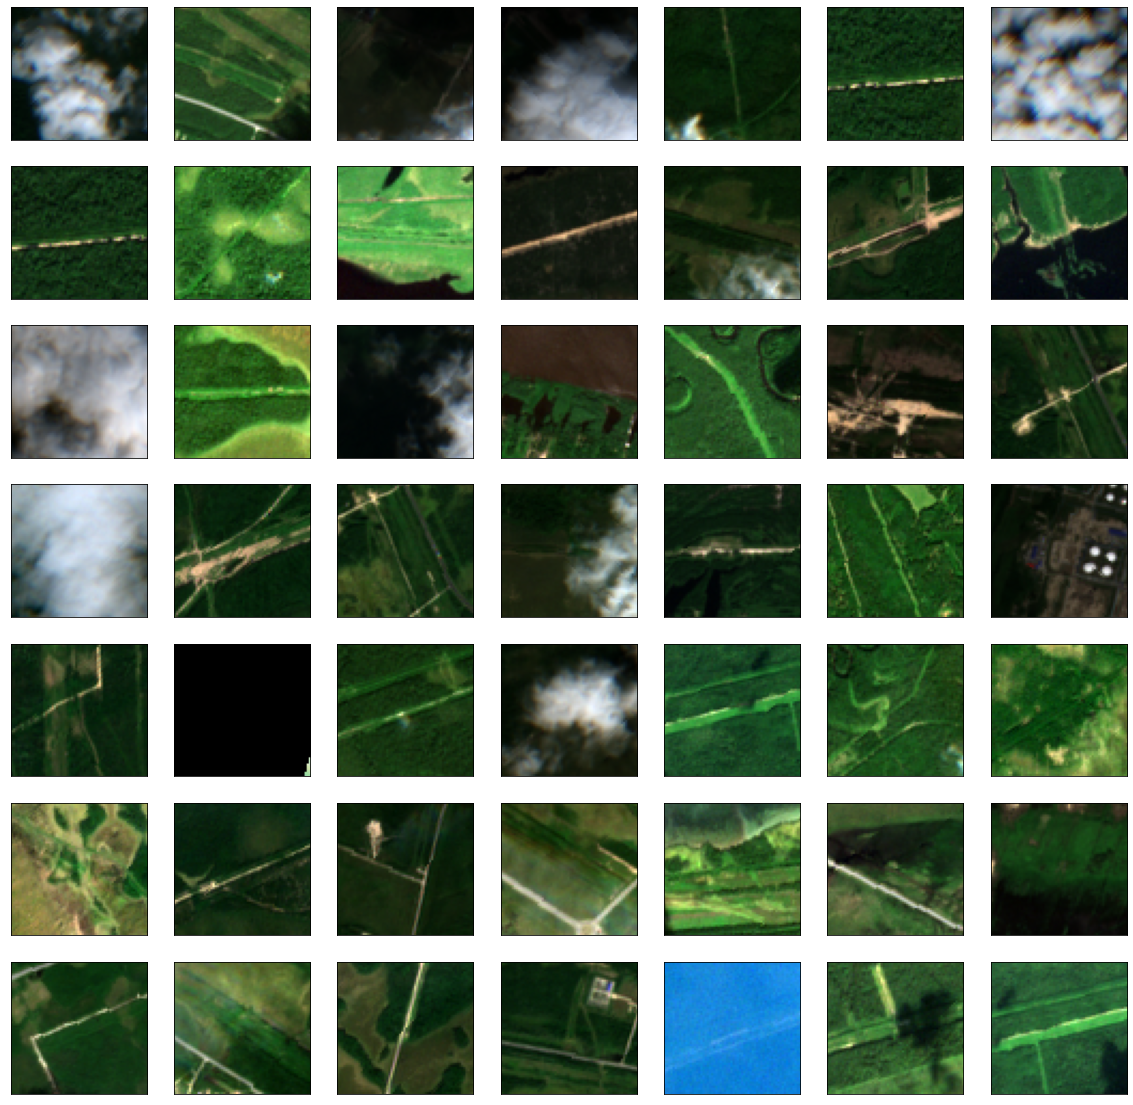

In [55]:
# Изучим фрагменты изобоажений в RGB-диапазоне

fig, axs = plt.subplots(nrows=7, ncols=7, figsize=(20, 20))

for i in range(len(patches)):
    date = datetime.datetime(2021, 1, 5)
    dates = np.array([timestamp.replace(tzinfo=None) for timestamp in patches[i].timestamp])
    closest_date_id = np.argsort(abs(date-dates))[0]
    
    ax = axs[i//7][i%7]
    ax.imshow(normalize(patches[i].data['L2A'][2][..., [3, 2, 1]]))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect("auto")

fig.subplots_adjust(wspace=0, hspace=0)

/tmp/ipykernel_19422/3681036076.py:6: RuntimeWarning: invalid value encountered in true_divide
  return np.array((x - np.min(x)) / (np.max(x) - np.min(x)))


IndexError: index 7 is out of bounds for axis 0 with size 7

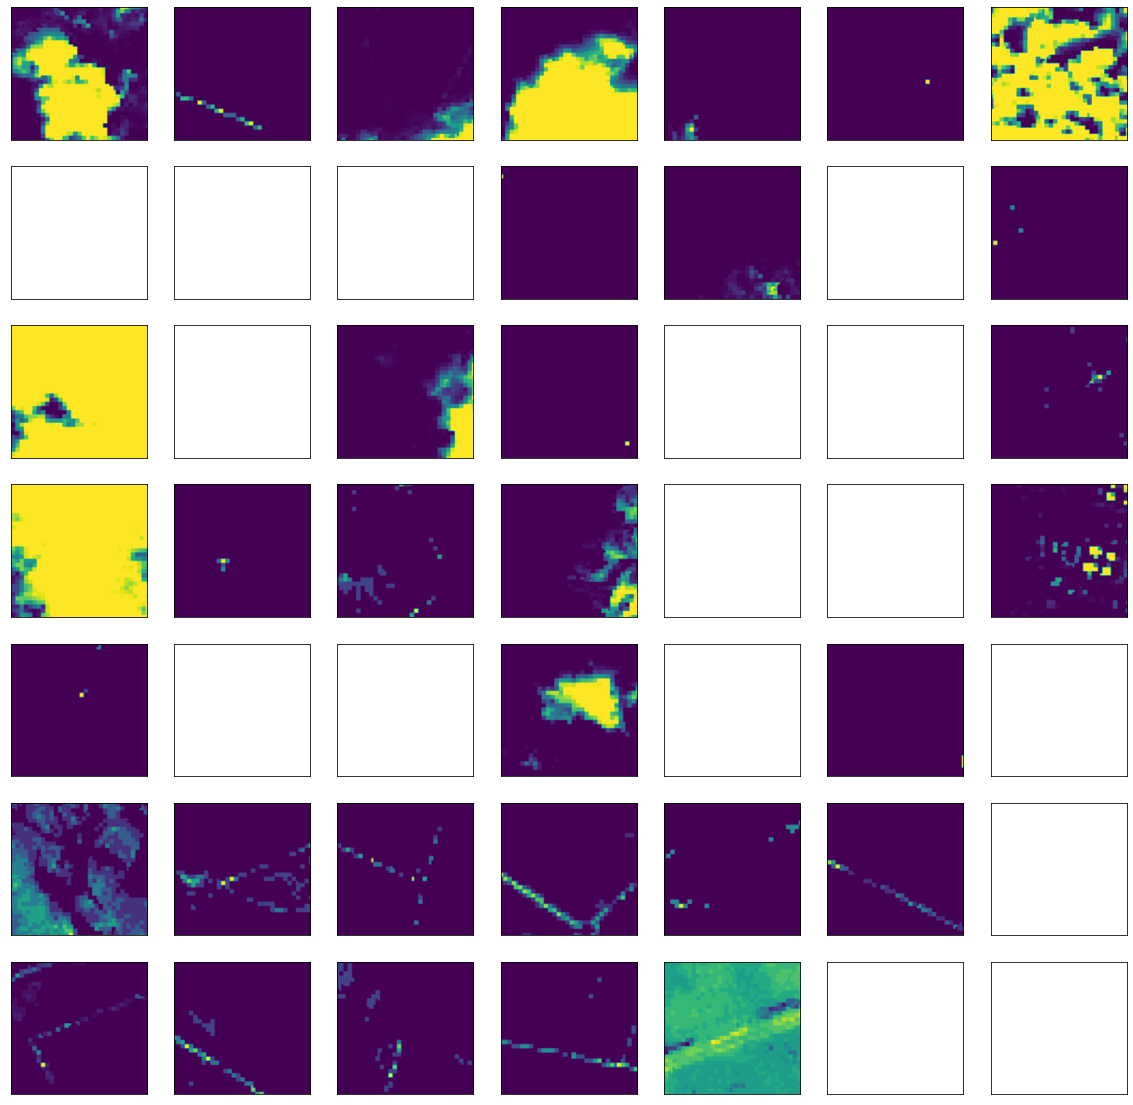

In [59]:
# Получим соответствующую маску облаков для идентификации перекрытий
fig, axs = plt.subplots(nrows=7, ncols=7, figsize=(20, 20))

for i in range(len(patches)):
    date = datetime.datetime(2021, 8, 5)
    dates = np.array([timestamp.replace(tzinfo=None) for timestamp in patches[i].timestamp])
    closest_date_id = np.argsort(abs(date-dates))[0]
    
    ax = axs[i//7][i%7]
    ax.imshow(normalize(patches[i].mask['CLD'][2]))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect("auto")

fig.subplots_adjust(wspace=0, hspace=0)

IndexError: index 7 is out of bounds for axis 0 with size 7

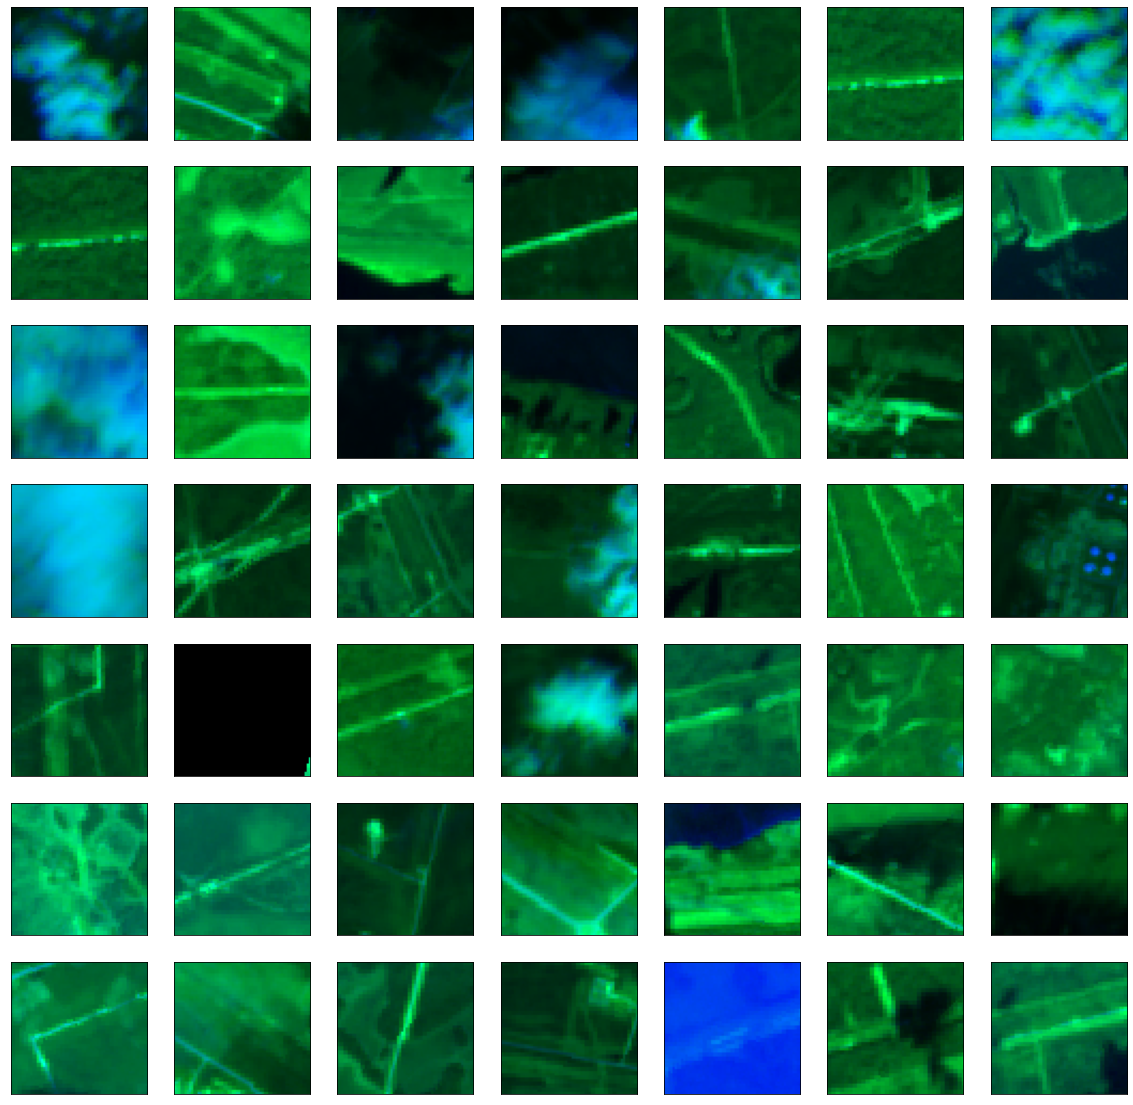

In [61]:
# Подключаем на R и G каналы SWIR бэнды, на B оставляем Blue
fig, axs = plt.subplots(nrows=7, ncols=7, figsize=(20, 20))

for i in range(len(patches)):
    date = datetime.datetime(2021, 8, 5)
    dates = np.array([timestamp.replace(tzinfo=None) for timestamp in patches[i].timestamp])
    closest_date_id = np.argsort(abs(date-dates))[0]
    
    ax = axs[i//7][i%7]
    ax.imshow(normalize(patches[i].data['L2A'][2][..., [12, 11, 1]]))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect("auto")

fig.subplots_adjust(wspace=0, hspace=0)

То есть, на красный и зеленый каналы мы подали коротковолновое инфракрасное излучение, из-за чего нам удалось идентифицировать растительность и скапливающийся конденсат (облака), а также потенциальный участок воды.

Однако видно, что на некоторых изображениях есть ложные true значения, идущие как тень от облаков. Это нас не удовлетворяет. Давайте изучим NIR-комбинацию

IndexError: index 7 is out of bounds for axis 0 with size 7

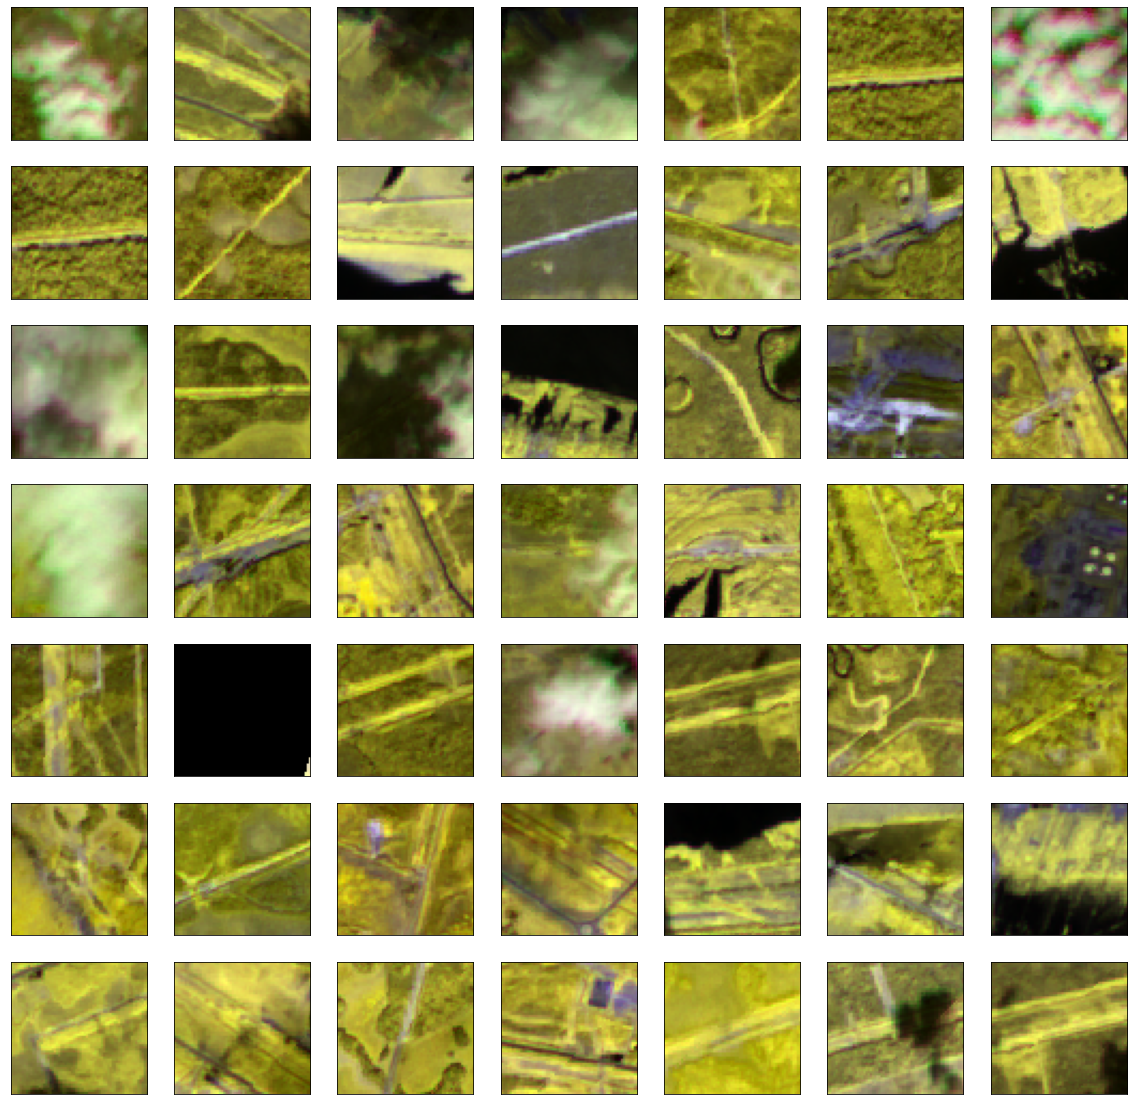

In [78]:
# Подключаем на R и G каналы NIR бэнды, на B оставляем Blue
fig, axs = plt.subplots(nrows=7, ncols=7, figsize=(20, 20))

for i in range(len(patches)):
    date = datetime.datetime(2021, 8, 5)
    dates = np.array([timestamp.replace(tzinfo=None) for timestamp in patches[i].timestamp])
    closest_date_id = np.argsort(abs(date-dates))[0]
    
    ax = axs[i//7][i%7]
    ax.imshow(normalize(patches[i].data['L2A'][2][..., [8, 7, 10]]))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect("auto")

fig.subplots_adjust(wspace=0, hspace=0)

Лучшим же вариантом здесь выступает NDVI-трансформация каналов, позволяющая избавиться от теней от облаков. Возьмем для примера характерное изображение и проведем трансформацию

(-0.5, 63.5, 63.5, -0.5)

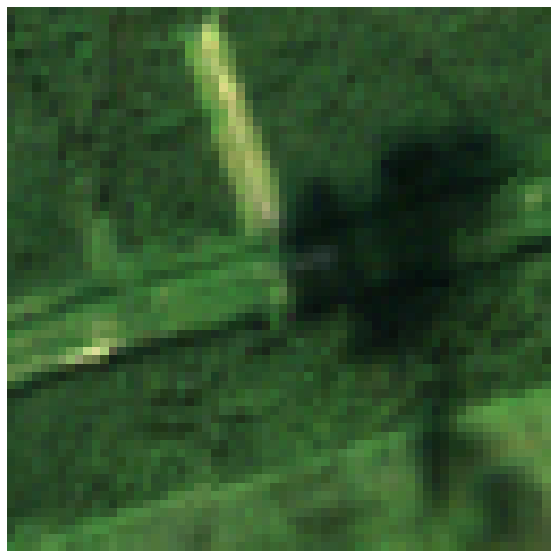

In [190]:
image = patches[47].data['L2A'][2][..., [3, 2, 1]]
plt.imshow(image)
plt.grid(False)
plt.axis('off')

(-0.5, 63.5, 63.5, -0.5)

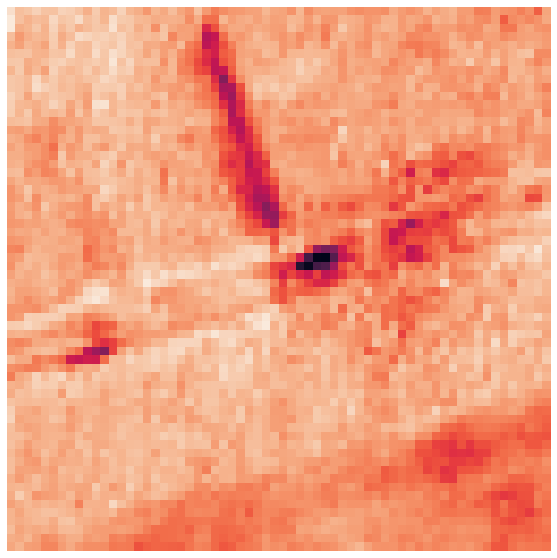

In [211]:
def sigma_normalize(x):
    """
    Нормализация массива пикселей с shape(m, n, c) в диапазон [-1, 1]
    m, n = 64; c = количество каналов
    """
    return np.array((x - np.mean(x)) / np.std(x))

B3 = patches[47].data['L2A'][2][..., [2]]
B8 = patches[47].data['L2A'][2][..., [7]]
NDWI = (B8 - B3) / (B3 + B8)
plt.imshow(sigma_normalize(NDWI))
plt.grid(False)
plt.axis('off')

(-0.5, 63.5, 63.5, -0.5)

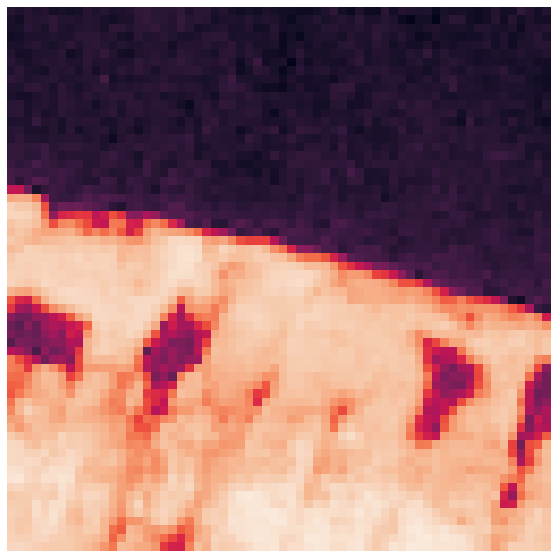

In [212]:
# Место разлива тоже остается местом разлива :)
B3 = patches[17].data['L2A'][2][..., [2]]
B8 = patches[17].data['L2A'][2][..., [7]]
NDWI = (B8 - B3) / (B3 + B8)
plt.imshow(sigma_normalize(NDWI))
plt.grid(False)
plt.axis('off')

/tmp/ipykernel_19422/3681036076.py:6: RuntimeWarning: invalid value encountered in true_divide
  return np.array((x - np.min(x)) / (np.max(x) - np.min(x)))


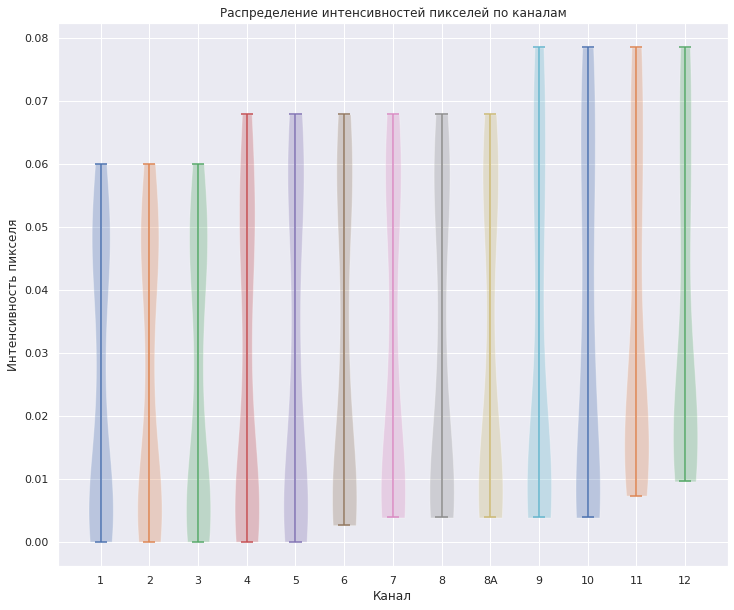

In [123]:
# Для понимания, как распределены величины поверхностного отражения для каждого из каналов,
# давайте построим violinplot
# Это может нам помочь при поиске особенностей канала для конкретных типов поверхности
import seaborn as sns

sns.set_style('darkgrid')

sns.set(rc={'figure.figsize':(12,10)})
fig, ax = plt.subplots()
channels = [i for i in range(13)]
ticks = []
for i in range(len(channels)):
    for j in range(64):
        tick = normalize(patches[2].data['L2A'][2][..., [i]])[j]
        ticks.append(tick)
    ax.set_ylabel('Интенсивность пикселя')
    ax.set_title('Распределение интенсивностей пикселей по каналам')
    ax.set_xlabel('Канал')
    ax.set_xticks(channels)
    ax.set_xticklabels(['1', '2', '3', '4', '5', '6', '7', '8', '8A', '9', '10', '11', '12'])
    ax.violinplot(dataset=ticks[i], positions=[i])

К сожалению, обычное распределение не позволяет нам включить некоторые каналы в основной этап идентификации. Однако, это можно осуществить с помощью Sen2Cor модуля, который позволяет получить значения поверхностного отражения на изображении. Дальнейшее распределение по соотвествию канал-маска, вероятно, помогло бы найти такие величины.

Для последующих же вычислений на самом деле хватит комбинации HDVI + SWIR.